# Exploring Loan Data From Prosper Dataset
## by Hussien sayed

## Investigation Overview

The goal of this investigation is to find relations between the loan amount, the number of investors and the icome range and to explore any features that relate to this features like term duration and loan status.


## Dataset Overview

This dataset contain information about loans (81 features). In this investigation i'm only intersted in exploring relations between some of these features like Loan amount,the number of investors,loan status,icome range and term duration.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
cols_of_interset = ["Term","LoanStatus","BorrowerAPR","EstimatedReturn"
                    ,"ProsperRating (numeric)","IncomeRange","StatedMonthlyIncome","LoanOriginalAmount","Investors"]
df2 = df[cols_of_interset]

## Loan amount distribution

Loan amonuts values vary in the range 0-35,000$ and most values are in range  0-15,000$ and the distribution is skewed to the right.

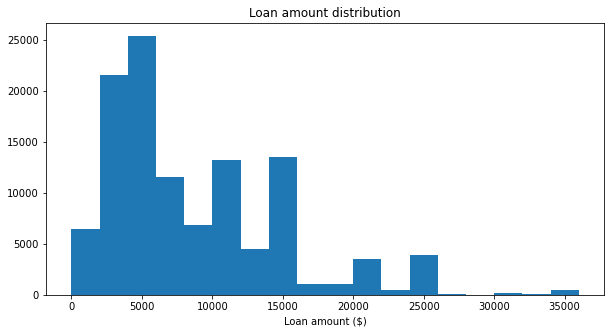

In [5]:
bins = np.arange(0, df2['LoanOriginalAmount'].max()+2000,2000)
plt.figure(figsize=[10, 5])
plt.xlabel('Loan amount ($)')
plt.title('Loan amount distribution')
plt.hist(data = df2, x = 'LoanOriginalAmount', bins = bins);

## Number of investors distribution

The log-scaled distribution of number of investors is a left skewed distribution having a peak around 70 investors.


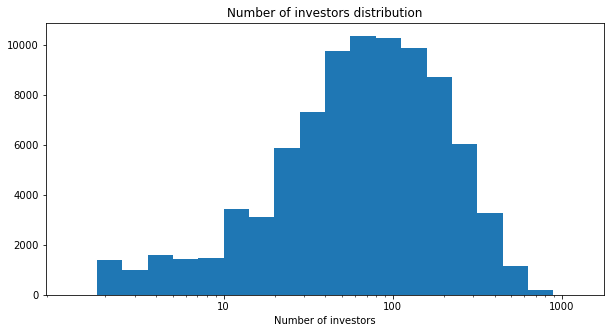

In [6]:
xticks = [10, 100,1000]
labels = ['{}'.format(v) for v in xticks]
bins = 10 ** np.arange(0.1, np.log10(df2['Investors'].max())+0.15, 0.15)
plt.figure(figsize=[10, 5])
plt.xlabel('Number of investors')
plt.title('Number of investors distribution')
plt.hist(data = df2, x = 'Investors', bins = bins);
plt.xscale('log')
plt.xticks(xticks, labels);

## Loan amount by income range

From the plot i noticed that people with an income range above 50,000$ tend more to have loans around 15,000$ than other income ranges and that a long tail exists in the 100,000$+ income range which means that these include the highest loan amounts . i also noticed that people with income range (1-25,000$) have the highes amount of loans below 5000$.


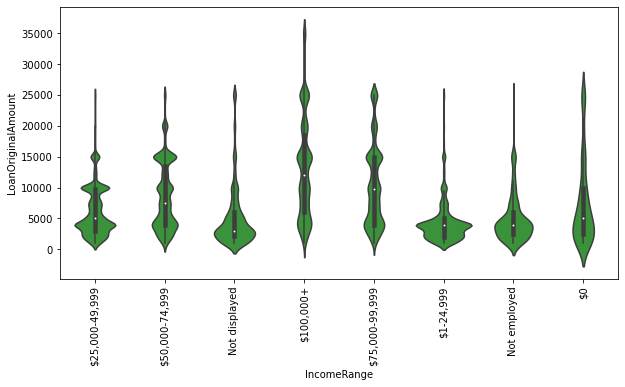

In [9]:
plt.figure(figsize = [10, 5]);
plt.xticks(rotation=90);
sb.violinplot(data = df2, x = 'IncomeRange', y = 'LoanOriginalAmount',color=sb.color_palette()[2]);

## Loan amount by income range and term duration

I noticed that high loan amount values have long term duration. I also notice that the 100,000$+ income range have the longest term duration at the highest loan amount.

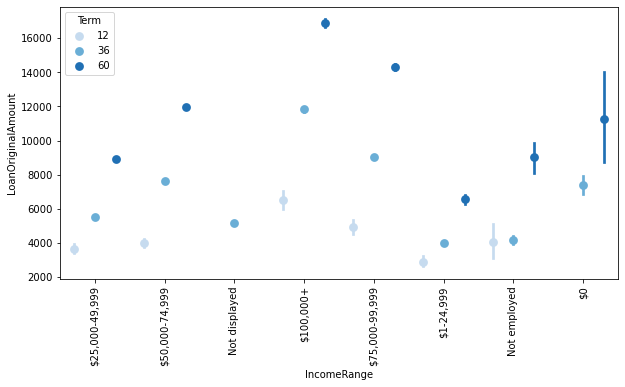

In [10]:
plt.figure(figsize = [10, 5]);
sb.pointplot(data = df3, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge =0.6);
plt.xticks(rotation=90);

## Number of investors by income range and term duration

I noticed from the graph that a medium number of investors for each income range has the longest term ratio while at maximum number of investors we have a medium term duration.

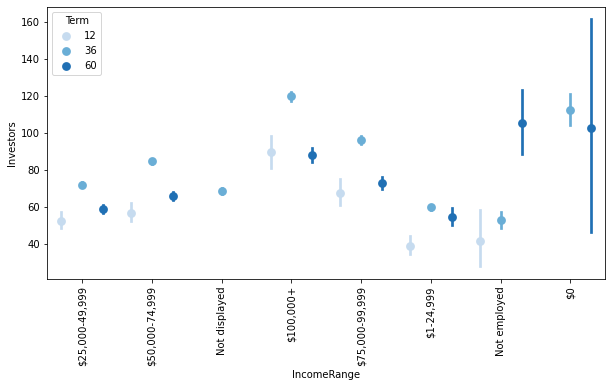

In [11]:
plt.figure(figsize = [10, 5]);
sb.pointplot(data = df3, x = 'IncomeRange', y = 'Investors', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge =0.6);
plt.xticks(rotation=90);